# Business case

The dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

# Business task

To analyse the data by performing exploratory data analysis and build an effective machine learning model to predict whether the mushroom is edible or poisonous based on certain attributes and features given in the dataset.

# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset

In [2]:
#loading the dataset
df = pd.read_csv('D:\\COURSES\\datasets\\mushrooms.csv')

In [3]:
df.shape

(8124, 23)

# Overview and statistical summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe(include='all').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


# Data cleaning

In [6]:
#checking for null values
df.isna().sum().sort_values(ascending=False)

class                       0
stalk-surface-above-ring    0
population                  0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-root                  0
cap-shape                   0
stalk-shape                 0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
habitat                     0
dtype: int64

Dataset does not contain any null values.

# Exploratory data analysis

In [8]:
# checking for class imbalance in target column
df['class'].value_counts(normalize=True)*100

e    51.797144
p    48.202856
Name: class, dtype: float64

There is no class imbalance in the target column

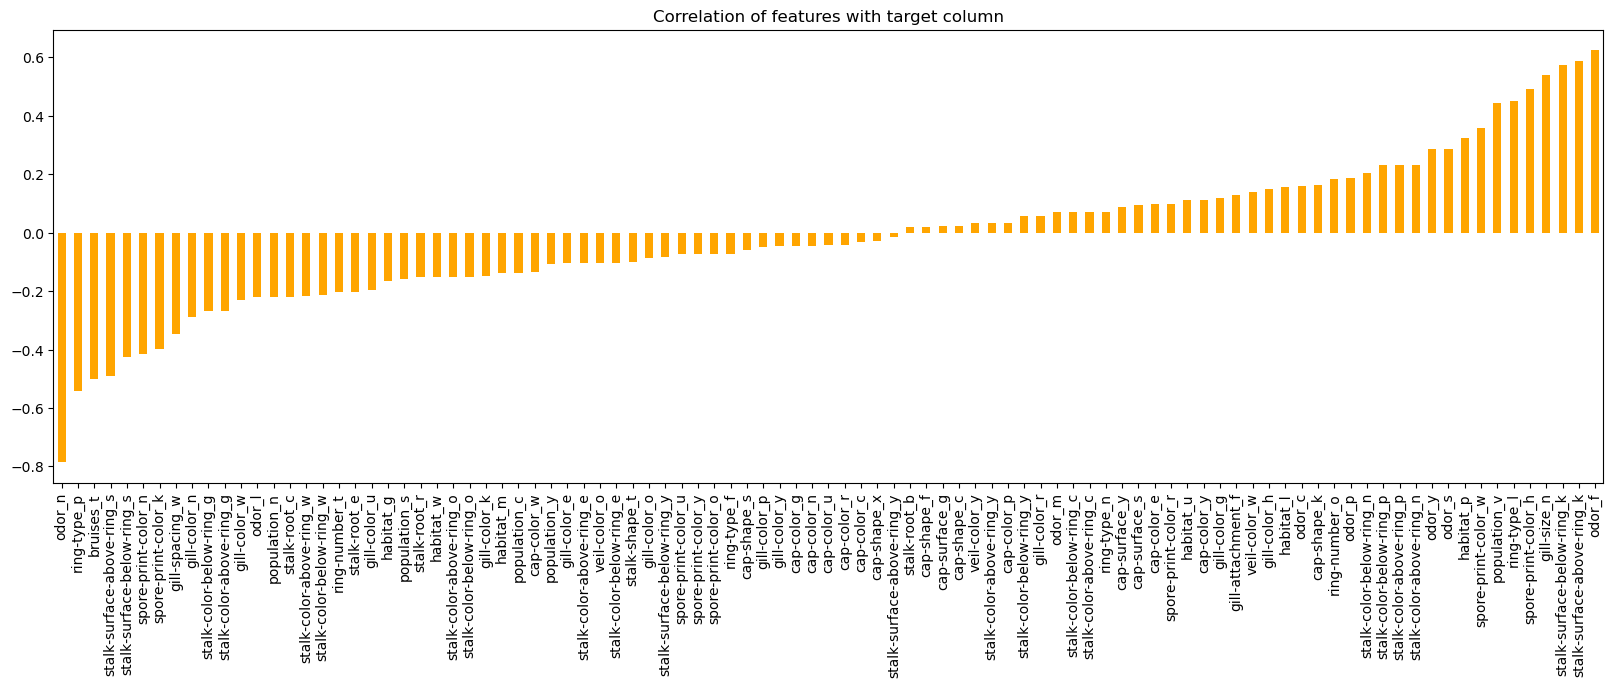

In [17]:
# checking correlation with target column
plt.figure(figsize=(20,6),dpi=100)
pd.get_dummies(df,drop_first=True).corr()['class_p'].sort_values()[:-1].plot(kind='bar',color = 'orange')
plt.xticks(rotation = 90)
plt.title('Correlation of features with target column');

Odor_f is highly positively correlated, whereas as odor_n is highly negatively correlated.

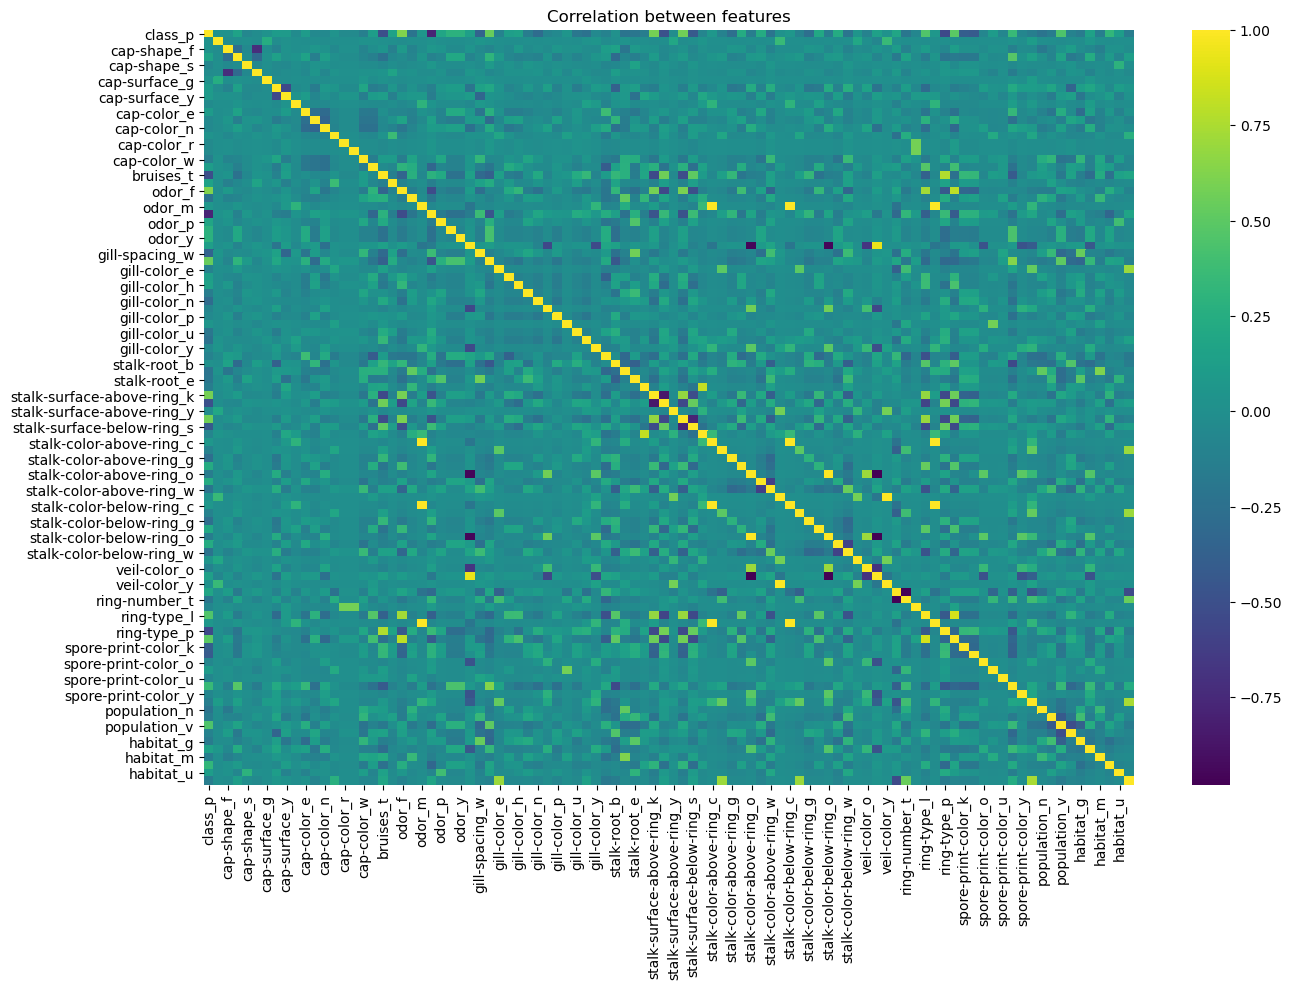

In [18]:
#checking correlation between features
plt.figure(figsize = (15,10),dpi=100)
sns.heatmap(pd.get_dummies(df,drop_first=True).corr(),cmap='viridis')
plt.title('Correlation between features');

In [19]:
# mapping the target columns to 0 and 1 (edible(e)=0, poisonous(p)=1)
df['class'] = df['class'].map({'e':0,'p':1})

In [20]:
df.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


# Feature engineering

In [21]:
#creating all categorical variables to binary varibles using dummy variables
df = pd.get_dummies(df,drop_first=True)
df.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
df.shape

(8124, 96)

# Creating X,y and doing train - test split

In [24]:
X = df.drop('class',axis=1)
y = df['class']

In [25]:
# setting test size to .25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
# instantiating standar scale
scale = StandardScaler()

In [27]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Building a model

Choosing random forest classifier

In [28]:
rf_model = RandomForestClassifier()

In [30]:
# choosing hyperparameters for grid search cv
params = {'n_estimators':[70,90,100,110,120],'criterion' : ["gini", "entropy"],'max_depth':[3,6,9,None],'max_features' : ["auto", "sqrt", "log2"]}

In [31]:
# choosing scoring metrics
scoring = ['accuracy','precision','recall','f1']

In [32]:
#refitting the grid search to recall
grid_model =GridSearchCV(estimator=rf_model,param_grid=params,scoring=scoring,cv=5,refit='recall')

In [33]:
%%time
grid_model.fit(X_train_scaled,y_train)

Wall time: 2min 12s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [70, 90, 100, 110, 120]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [34]:
# checking best score
grid_model.best_score_

1.0

In [35]:
# checking best params
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 70}

In [36]:
rf_model_new = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=9,max_features='auto')

In [37]:
rf_model_new.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=9, n_estimators=70)

In [38]:
y_pred = rf_model_new.predict(X_test_scaled)

# Model evaluation

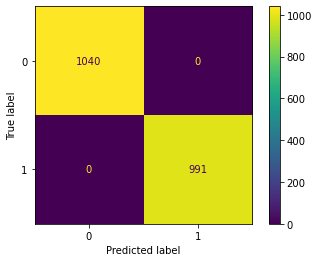

In [39]:
plot_confusion_matrix(grid_model,X_test_scaled,y_test)

From the above there are 0 False positives and 0 False negatives

In [46]:
Scores = {'Accuracy':accuracy_score(y_test,y_pred),'F1_score':f1_score(y_test,y_pred),'Recall':recall_score(y_test,y_pred),'Precision':precision_score(y_test,y_pred)}
Scores

{'Accuracy': 1.0, 'F1_score': 1.0, 'Recall': 1.0, 'Precision': 1.0}

Model has scored perfect 1.0 i.e 100% for all the above evaluating scores

In [40]:
# Creating data frame for features and their importance
df_features = pd.DataFrame(data={'name':X.columns,'feat':rf_model_new.feature_importances_}).sort_values('feat',ascending=False)

In [41]:
df_features

,name,feat
22,odor_n,0.181514
48,stalk-surface-below-ring_k,0.074339
28,gill-size_n,0.066807
19,odor_f,0.065722
17,bruises_t,0.050195
...,...,...
35,gill-color_p,0.000096
39,gill-color_y,0.000087
21,odor_m,0.000043
83,spore-print-color_y,0.000000


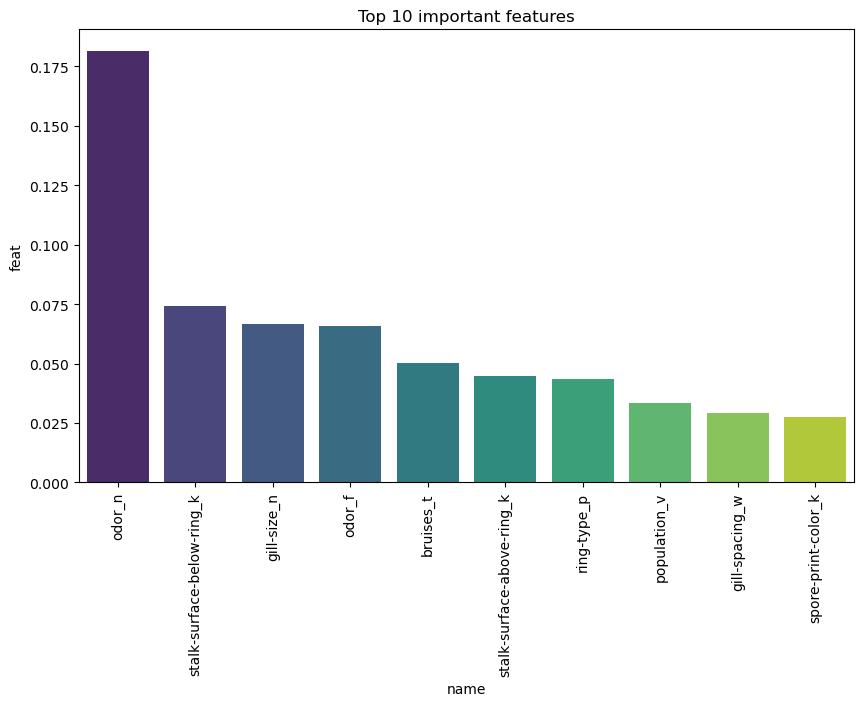

In [48]:
#plotting bar plot for top 10 features based on feature importance
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=df_features.head(10),x='name',y='feat',palette='viridis')
plt.xticks(rotation = 90)
plt.title('Top 10 important features');

# Summary

**Based on performance evaluation Random forest classifier has performed exceptionally well with perfect below scores**
* **Accuracy is 1.0**
* **Precision is 1.0**
* **Recall is 1.0**
* **F1_score is 1.0**

**Based on feature importance odor_n is the most important feature to predict whether a mushroom is edible or poisonous**

**Thankyou!**